# Extrema vs saddle points

For a random function, how many minima/maxima vs. saddle points do we obtain? The function here is taken to be a superposition of plane waves with random amplitudes. This can easily be obtained via Fourier transformation, and the resulting Gaussian random field is a popular model studied in this context (and in many other areas of science).

For simplicity, we only consider 2D. 3D would still be feasible numerically, higher dimensions cannot be treated in the same brute-force way.

Code 10/2021 by Florian Marquardt, for the course 'Advanced Machine Learning for Physics, Science, and Artificial Scientific Discovery'. MIT License.

https://github.com/FlorianMarquardt/advanced_machine_learning

In [109]:
import numpy as np
import matplotlib.pyplot as plt

In [110]:
# produce a random field as a superposition of plane waves
N=300 # pixels on grid
k_values=np.fft.fftfreq(N)*2*np.pi # the k values
kx=k_values[:,None]
ky=k_values[None,:]

# the power spectrum in Fourier space --
# faster falloff towards high k means 
# smoother field in real space
power_spectrum_amp=np.exp(-100*(kx**2+ky**2))
# (note: the power spectrum will be the square of this...)

# phi(k), i.e. the random field in Fourier space:
# we use complex Gaussian random numbers 
phi_k=power_spectrum_amp*(np.random.randn(N,N)+1j*np.random.randn(N,N))

# Fourier transform to get field in real space:
phi=np.real(np.fft.ifft2(phi_k))

# now extract extrema, simply from zeros
# of numerically obtained gradient (could also
# do this more elegantly in tensorflow!)
grad=[phi[1:,1:]-phi[:-1,1:],phi[1:,1:]-phi[1:,:-1]] # dphi/dx and dphi/dy
grad_zero_crossings=[(g[1:,1:]*g[:-1,1:]<0)|(g[1:,1:]*g[1:,:-1]<0) for g in grad]
# the extrema are where both dphi/dx and dphi/dy are zero:
grad_where_zero_crossings=np.where(grad_zero_crossings[0]&grad_zero_crossings[1])

# obtain numerically the second derivative matrix,
# the Hessian; this is two nested lists forming
# a 2x2 matrix, but the entries of that matrix are
# 2D arrays relating to the whole grid on which the
# field is defined!
Hessian=[[g[1:,1:]-g[:-1,1:], g[1:,1:]-g[1:,:-1]] for g in grad]

# get trace and determinant --
# from these one may deduce the signs of the
# eigenvalues of the Hessian, i.e. the curvatures;
# and from that one can deduce whether one is looking
# at a maximum/minimum/saddle point!
Hessian_trace=Hessian[0][0]+Hessian[1][1]
Hessian_det=Hessian[0][0]*Hessian[1][1]-Hessian[1][0]*Hessian[0][1]

# now evaluate these at the extrema identified above!

Hessian_trace_at_extrema=Hessian_trace[grad_where_zero_crossings]
Hessian_det_at_extrema=Hessian_det[grad_where_zero_crossings]

minima=(Hessian_trace_at_extrema>0)&(Hessian_det_at_extrema>0)
maxima=(Hessian_trace_at_extrema<0)&(Hessian_det_at_extrema>0)
saddle_points=Hessian_det_at_extrema<0

N_extrema=len(grad_where_zero_crossings[0])

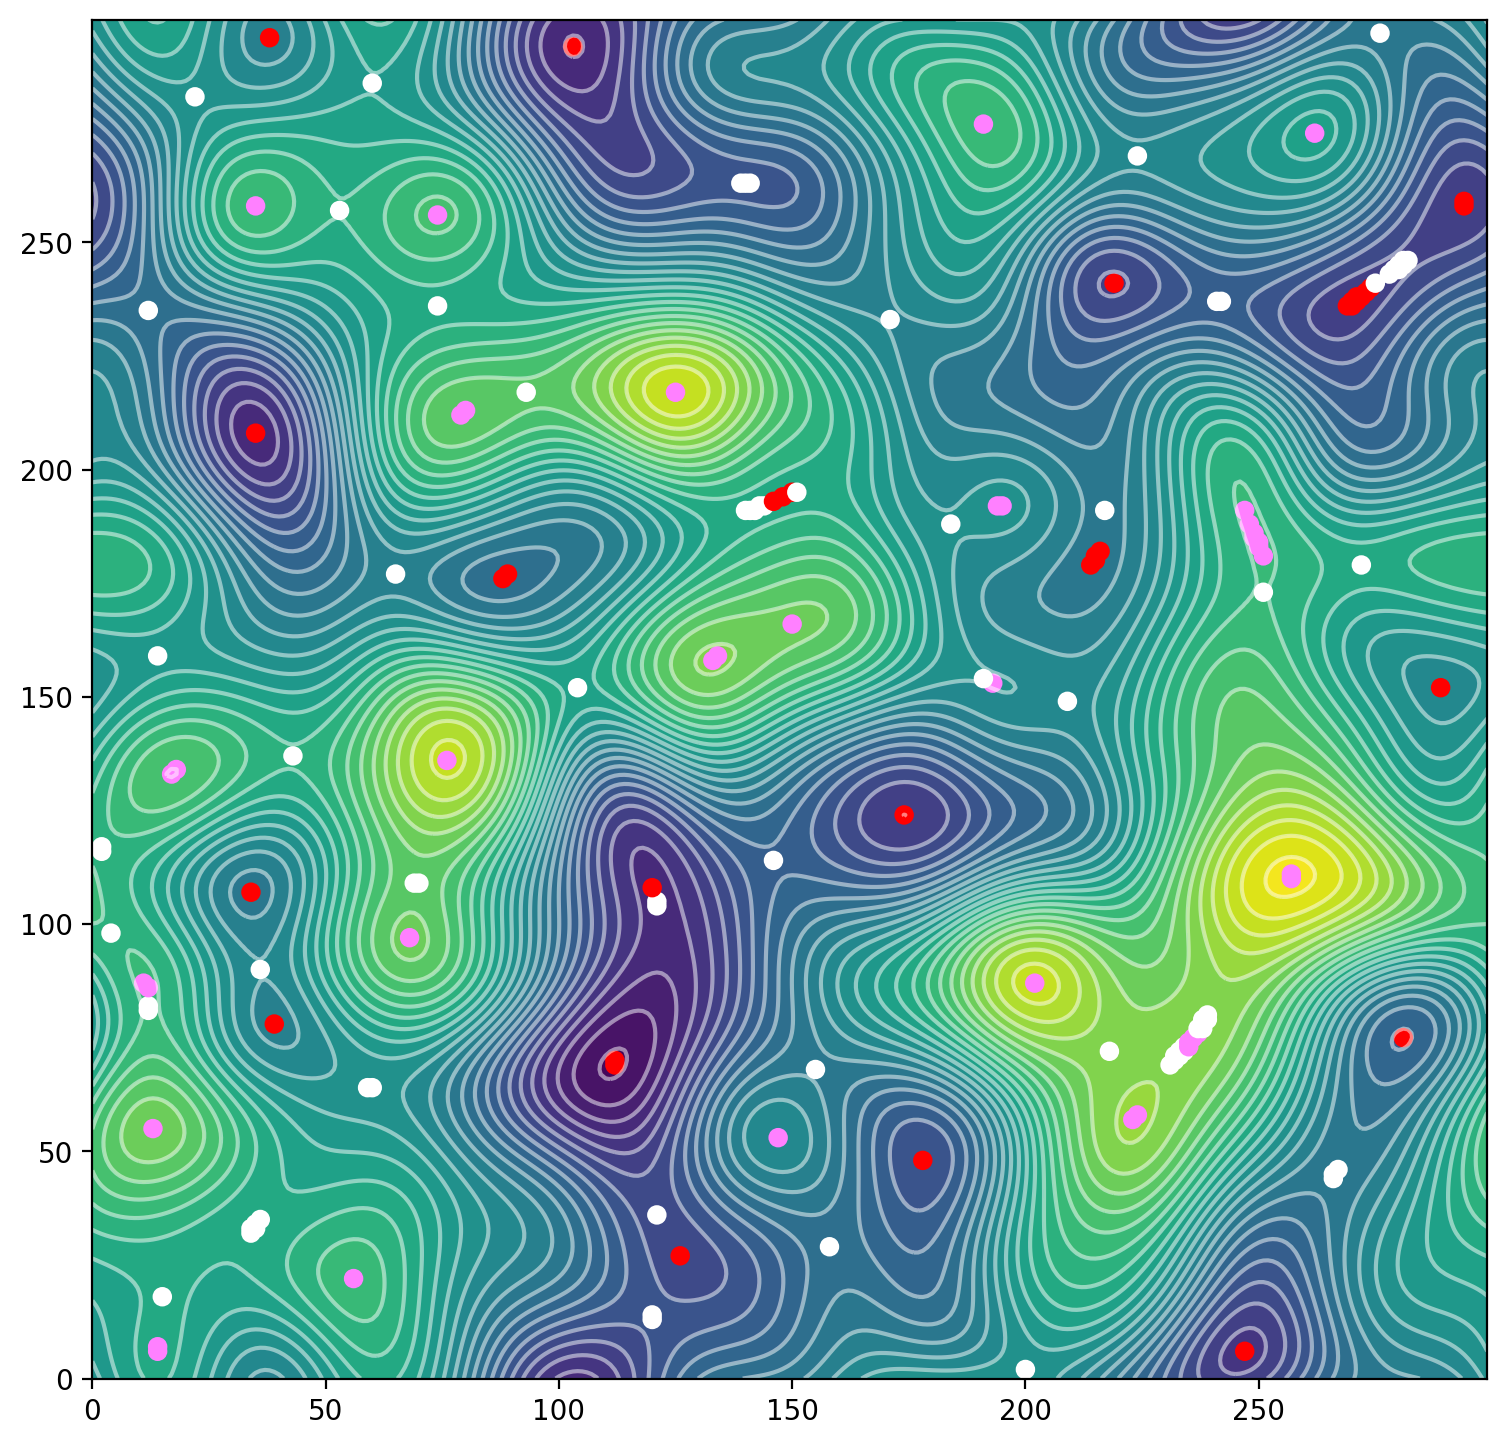

In [111]:
# now plot the function as a contour plot,
# but with all extrema marked
# minima in red, maxima in pink, saddle points in white
plt.figure(dpi=200,figsize=(9,9))
plt.contourf(phi,30)
plt.contour(phi,30,colors='white',
    linestyles='solid',alpha=0.5)

# initialize colors for the different types of extrema:
# usual matplotlib color list syntax for a scatter plot
minima_color=np.full([N_extrema,3],[1,0,0.0])
maxima_color=np.full([N_extrema,3],[1,0.5,1])
saddle_points_color=np.full([N_extrema,3],[1,1,1.0])

plt.scatter(grad_where_zero_crossings[1]+1,
    grad_where_zero_crossings[0]+1,
    c=  minima_color*minima[:,None]+
        maxima_color*maxima[:,None]+
        saddle_points_color*saddle_points[:,None])
plt.show()

In [112]:
print("Number of minima:",np.sum(minima))
print("Number of maxima:",np.sum(maxima))
print("Number of saddle points:",np.sum(saddle_points))
print("These numbers are overestimates due to discretization effects, but that should be fine for the relative comparison.")

Number of minima: 34
Number of maxima: 40
Number of saddle points: 80
These numbers are overestimates due to discretization effects, but that should be fine for the relative comparison.
